In [1]:
import pandas as pd
import yfinance as yf
import numpy as np

In [2]:
df = yf.download('WEGE3.SA', '2010-01-01', '2022-08-31')['Close']
df = df.to_frame()
df

[*********************100%***********************]  1 of 1 completed


,Close
Date,
2010-01-04,2.711538
2010-01-05,2.705621
2010-01-06,2.720414
2010-01-07,2.766272
2010-01-08,2.866863
...,...
2022-08-24,28.790001
2022-08-25,28.950001
2022-08-26,28.809999


In [3]:
media_movel_250d = df.rolling(250).mean()
media_movel_250d

,Close
Date,
2010-01-04,NaN
2010-01-05,NaN
2010-01-06,NaN
2010-01-07,NaN
2010-01-08,NaN
...,...
2022-08-24,31.86080
2022-08-25,31.83108
2022-08-26,31.79924


In [4]:
df['MM250D'] = media_movel_250d.values

df = df.dropna()

df


,Close,MM250D
Date,,
2011-01-05,3.152366,2.777881
2011-01-06,3.118343,2.779508
2011-01-07,3.122781,2.781177
2011-01-10,3.124260,2.782792
2011-01-11,3.173076,2.784420
...,...,...
2022-08-24,28.790001,31.860800
2022-08-25,28.950001,31.831080
2022-08-26,28.809999,31.799240


<AxesSubplot:xlabel='Date'>

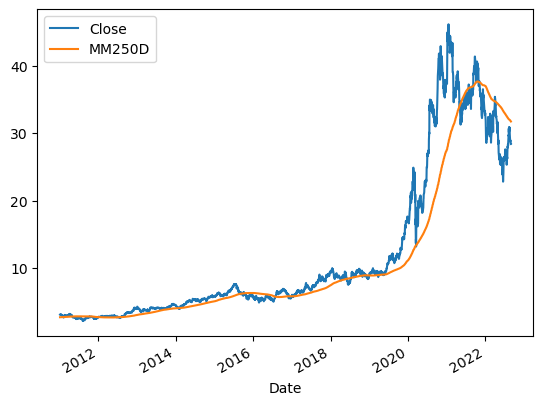

In [5]:
df.plot()

C:\Users\Pichau\AppData\Local\Temp\ipykernel_19216\2539927094.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Ordem'] = np.where(df['Close'] < df['MM250D'], 'Compra', 'Venda')


<AxesSubplot:xlabel='Date'>

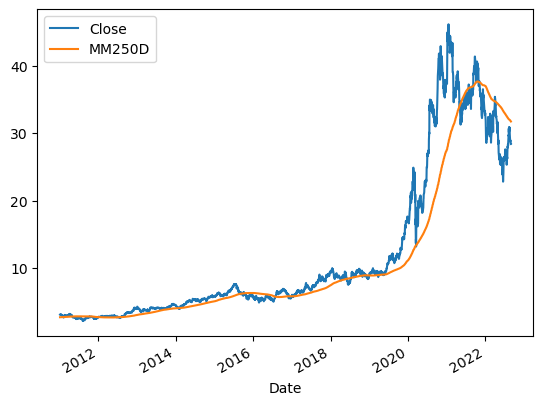

In [6]:
df['Ordem'] = np.where(df['Close'] < df['MM250D'], 'Compra', 'Venda')
df.plot()

In [7]:
media_movel_exp = df['Close'].ewm(span = 250).mean()
media_movel_exp

Date
2011-01-05     3.152366
2011-01-06     3.135286
2011-01-07     3.131085
2011-01-10     3.129358
2011-01-11     3.138242
                ...    
2022-08-24    30.467253
2022-08-25    30.455163
2022-08-26    30.442054
2022-08-29    30.425544
2022-08-30    30.409324
Name: Close, Length: 2893, dtype: float64

<AxesSubplot:xlabel='Date'>

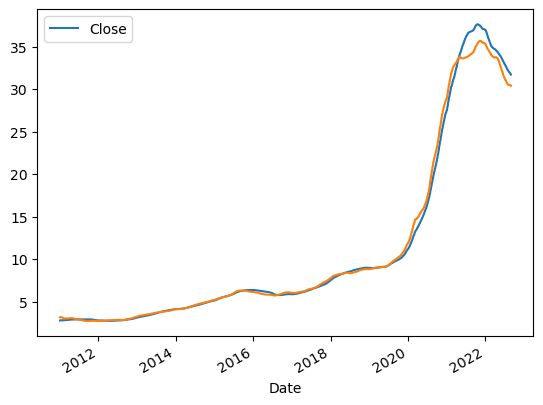

In [8]:
media_movel_250d.plot()
media_movel_exp.plot()

In [9]:
volatilidade_diaria_12m = df[['Close']].pct_change().rolling(250).std()

volatilidade_diaria_12m

,Close
Date,
2011-01-05,NaN
2011-01-06,NaN
2011-01-07,NaN
2011-01-10,NaN
2011-01-11,NaN
...,...
2022-08-24,0.022251
2022-08-25,0.022215
2022-08-26,0.022205


In [10]:
volatilidade_diaria_12m = volatilidade_diaria_12m.dropna()

volatilidade_diaria_12m = volatilidade_diaria_12m * np.sqrt(252)

volatilidade_diaria_12m

,Close
Date,
2012-01-05,0.313314
2012-01-06,0.313334
2012-01-09,0.313330
2012-01-10,0.313370
2012-01-11,0.312963
...,...
2022-08-24,0.353216
2022-08-25,0.352649
2022-08-26,0.352486


<AxesSubplot:xlabel='Date'>

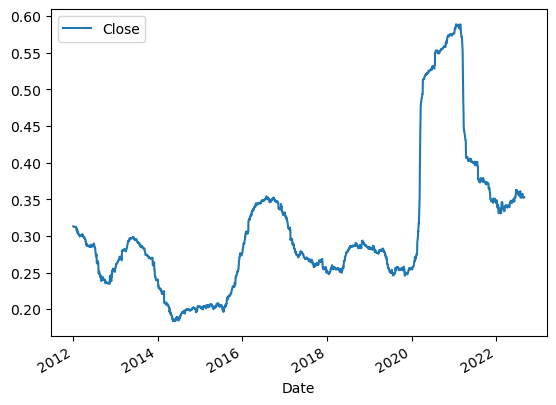

In [11]:
volatilidade_diaria_12m.plot()

# Exercícios

- Exercício 81: Puxe dados de uma ação a sua escolha e calcule a média móvel de 30 dias desde 01/01/2020. Depois, identifique os sinais de compra ou venda, baseado na média móvel.

- Exercício 82: Com os dados do exercício 81, calcule a média móvel exponencial de 30 dias.

- Exercício 83: Com os dados do exercício 81, calcule a volatilidade dos retornos diários anualizada no período.

In [25]:
# Exercício 81

df = yf.download('LEVE3.SA', '2020-01-01')[['Close']]
media_movel_30d = df.rolling(30).mean()
df['MM30D'] = media_movel_30d.values
df = df.dropna()
df['Ordem'] = np.where(df['Close'] < df['MM30D'], 'Compra', 'Venda')
df

[*********************100%***********************]  1 of 1 completed


C:\Users\Pichau\AppData\Local\Temp\ipykernel_19216\3347225061.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['MM30D'] = media_movel_30d.values


,Close,MM30D,Ordem
Date,,,
2020-02-12,31.120001,31.074000,Venda
2020-02-13,30.549999,31.097333,Compra
2020-02-14,29.959999,31.129667,Compra
2020-02-17,30.500000,31.162667,Compra
2020-02-18,29.990000,31.185667,Compra
...,...,...,...
2023-01-19,31.940001,29.596667,Venda
2023-01-20,32.099998,29.693667,Venda
2023-01-23,32.500000,29.786333,Venda


In [26]:
# Exercício 82

media_movel_exp = df[['Close']].ewm(span = 30).mean()
media_movel_exp

,Close
Date,
2020-02-12,31.120001
2020-02-13,30.825500
2020-02-14,30.517560
2020-02-17,30.512721
2020-02-18,30.393790
...,...
2023-01-19,29.832268
2023-01-20,29.978574
2023-01-23,30.141246


In [27]:
# Exercício 83

volatilidade_diaria_12m = df[['Close']].pct_change().rolling(30).std()

volatilidade_diaria_12m = volatilidade_diaria_12m.dropna()

volatilidade_diaria_12m = volatilidade_diaria_12m * np.sqrt(252)

volatilidade_diaria_12m

,Close
Date,
2020-03-27,0.903125
2020-03-30,0.910486
2020-03-31,0.915675
2020-04-01,0.909973
2020-04-02,0.912126
...,...
2023-01-19,0.447839
2023-01-20,0.429395
2023-01-23,0.428024
